In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv('Loan_Data.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# ProfileReport(data).to_file(output_file = "Initial_profiling_report.html")

In [5]:
# TODO: Come up with better dataframes names
dfHighCorr = data[['Loan_ID','LoanAmount', 'Credit_History']].dropna()

In [6]:
# TODO: consider implementing KNN
dfNotHighCorr = data[['Loan_ID', 'Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']]
# TODO: think of better alternative
# dfNotHighCorr = dfNotHighCorr.fillna(dfNotHighCorr.median())

# dfNotHighCorr['Gender']=dfNotHighCorr['Gender'].fillna(dfNotHighCorr['Gender'].mode()[0])
# dfNotHighCorr['Loan_Amount_Term']=dfNotHighCorr['Loan_Amount_Term'].fillna(dfNotHighCorr['Loan_Amount_Term'].mode()[0])
# dfNotHighCorr['Dependents']=dfNotHighCorr['Dependents'].fillna(dfNotHighCorr['Dependents'].mode()[0])
# dfNotHighCorr['Self_Employed']=dfNotHighCorr['Self_Employed'].fillna(dfNotHighCorr['Self_Employed'].mode()[0])

dfNotHighCorr = dfNotHighCorr.dropna()

**dfPart**: merging high correlation data frame with non-high correlation data frame

In [7]:
dfPart = pd.merge(dfHighCorr, dfNotHighCorr, on='Loan_ID')

In [8]:
dfRest = data.loc[:, ['Loan_ID','Married','Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area', 'Loan_Status']]

In [9]:
df = pd.merge(dfRest, dfPart, on='Loan_ID')
df

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,LoanAmount,Credit_History,Gender,Dependents,Self_Employed,Loan_Amount_Term
0,LP001003,Yes,Graduate,4583,1508.0,Rural,N,128.0,1.0,Male,1,No,360.0
1,LP001005,Yes,Graduate,3000,0.0,Urban,Y,66.0,1.0,Male,0,Yes,360.0
2,LP001006,Yes,Not Graduate,2583,2358.0,Urban,Y,120.0,1.0,Male,0,No,360.0
3,LP001008,No,Graduate,6000,0.0,Urban,Y,141.0,1.0,Male,0,No,360.0
4,LP001011,Yes,Graduate,5417,4196.0,Urban,Y,267.0,1.0,Male,2,Yes,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,No,Graduate,2900,0.0,Rural,Y,71.0,1.0,Female,0,No,360.0
476,LP002979,Yes,Graduate,4106,0.0,Rural,Y,40.0,1.0,Male,3+,No,180.0
477,LP002983,Yes,Graduate,8072,240.0,Urban,Y,253.0,1.0,Male,1,No,360.0
478,LP002984,Yes,Graduate,7583,0.0,Urban,Y,187.0,1.0,Male,2,No,360.0


Hot Encoding

In [10]:
# 'Married', 'Education', 'Loan_Status', 'Gender', 'Self_Employed'
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].replace(['Graduate', 'Not Graduate'], [1, 0])
df['Loan_Status'] = df['Loan_Status'].replace(['Y', 'N'], [1, 0])
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0])
df['Dependents'] = df['Dependents'].replace(['3+'], [3])
df['Self_Employed'] = df['Self_Employed'].replace(['Yes', 'No'], [1, 0])

df

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,LoanAmount,Credit_History,Gender,Dependents,Self_Employed,Loan_Amount_Term
0,LP001003,1,1,4583,1508.0,Rural,0,128.0,1.0,1,1,0,360.0
1,LP001005,1,1,3000,0.0,Urban,1,66.0,1.0,1,0,1,360.0
2,LP001006,1,0,2583,2358.0,Urban,1,120.0,1.0,1,0,0,360.0
3,LP001008,0,1,6000,0.0,Urban,1,141.0,1.0,1,0,0,360.0
4,LP001011,1,1,5417,4196.0,Urban,1,267.0,1.0,1,2,1,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,0,1,2900,0.0,Rural,1,71.0,1.0,0,0,0,360.0
476,LP002979,1,1,4106,0.0,Rural,1,40.0,1.0,1,3,0,180.0
477,LP002983,1,1,8072,240.0,Urban,1,253.0,1.0,1,1,0,360.0
478,LP002984,1,1,7583,0.0,Urban,1,187.0,1.0,1,2,0,360.0


In [11]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [12]:
df = pd.get_dummies(df, columns=['Dependents'])
# TODO: reposition Dependents_3 column

one last step is to put target at the end of the data frame

In [13]:
target = df.pop('Loan_Status')
df = df.assign(Loan_Status = target)

In [14]:
df

,Loan_ID,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender,Self_Employed,Loan_Amount_Term,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Loan_Status
0,LP001003,1,1,4583,1508.0,128.0,1.0,1,0,360.0,1,0,0,0,0,1,0,0
1,LP001005,1,1,3000,0.0,66.0,1.0,1,1,360.0,0,0,1,0,1,0,0,1
2,LP001006,1,0,2583,2358.0,120.0,1.0,1,0,360.0,0,0,1,0,1,0,0,1
3,LP001008,0,1,6000,0.0,141.0,1.0,1,0,360.0,0,0,1,0,1,0,0,1
4,LP001011,1,1,5417,4196.0,267.0,1.0,1,1,360.0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,0,1,2900,0.0,71.0,1.0,0,0,360.0,1,0,0,0,1,0,0,1
476,LP002979,1,1,4106,0.0,40.0,1.0,1,0,180.0,1,0,0,1,0,0,0,1
477,LP002983,1,1,8072,240.0,253.0,1.0,1,0,360.0,0,0,1,0,0,1,0,1
478,LP002984,1,1,7583,0.0,187.0,1.0,1,0,360.0,0,0,1,0,0,0,1,1


In [15]:
# TODO: Dropping `Loan_ID` and merge it after? any other ways to map it for later?
df = df.drop('Loan_ID', axis=1)

ProfileReport

In [16]:
# ProfileReport(df).to_file(output_file = "Final_profiling_report.html")

modeling and resampling

In [17]:
# Allocate inputs
X = df.drop('Loan_Status', axis=1)

# Allocate outputs
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

apply feature selection using extra tree classifier

In [18]:
# TODO: add feature selection logic here

models

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.92      0.36      0.52        33
           1       0.75      0.98      0.85        63

    accuracy                           0.77        96
   macro avg       0.84      0.67      0.69        96
weighted avg       0.81      0.77      0.74        96
 
confusion matrix
 [[12 21]
 [ 1 62]] 

Accuracy = 0.7708333333333334


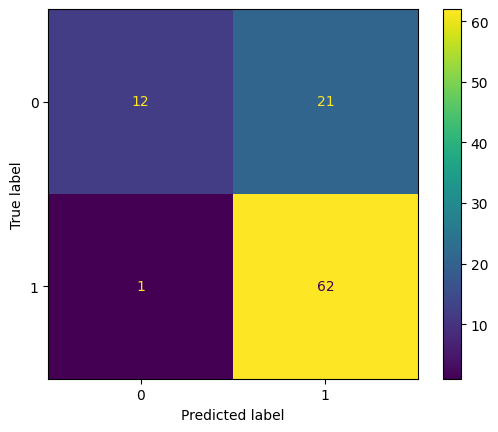

In [22]:
# Logistic Regression
lr = LogisticRegression(max_iter=100).fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Confusion Matrix and reports
print("CLASSIFICATION REPORT\n", 
      classification_report(y_test, y_pred_lr),
      "\nconfusion matrix\n",
      confusion_matrix(y_test, y_pred_lr),
      "\n\nAccuracy =",
      accuracy_score(y_test, y_pred_lr)
      )
cm = confusion_matrix(y_test, y_pred_lr) 
display = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = lr.classes_)
display.plot()
plt.show()


Random Forest Classifier

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.67      0.36      0.47        33
           1       0.73      0.90      0.81        63

    accuracy                           0.72        96
   macro avg       0.70      0.63      0.64        96
weighted avg       0.71      0.72      0.69        96
 
confusion matrix
 [[12 21]
 [ 6 57]] 

Accuracy = 0.71875


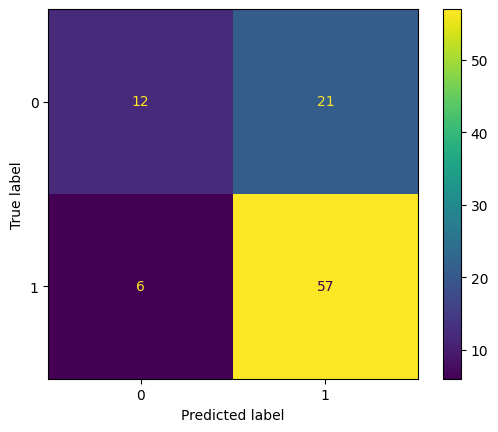

In [29]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state = 1, n_estimators = 200).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Confusion Matrix and reports
print("CLASSIFICATION REPORT\n", 
      classification_report(y_test, y_pred_rf),
      "\nconfusion matrix\n",
      confusion_matrix(y_test, y_pred_rf),
      "\n\nAccuracy =",
      accuracy_score(y_test, y_pred_rf)
      )
cm = confusion_matrix(y_test, y_pred_rf) 
display = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = rf.classes_)
display.plot()
plt.show()


XGBoost

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.57      0.36      0.44        33
           1       0.72      0.86      0.78        63

    accuracy                           0.69        96
   macro avg       0.65      0.61      0.61        96
weighted avg       0.67      0.69      0.67        96
 
confusion matrix
 [[12 21]
 [ 9 54]] 

Accuracy = 0.6875


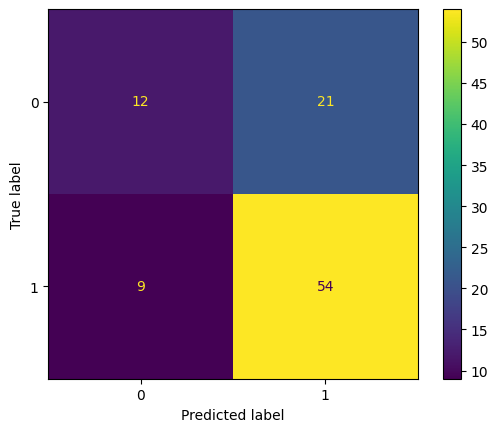

In [38]:
from xgboost import XGBClassifier

# Random Forest Classifier
xgb = XGBClassifier(objective="binary:logistic").fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Confusion Matrix and reports
print("CLASSIFICATION REPORT\n", 
      classification_report(y_test, y_pred_xgb),
      "\nconfusion matrix\n",
      confusion_matrix(y_test, y_pred_xgb),
      "\n\nAccuracy =",
      accuracy_score(y_test, y_pred_xgb)
      )
cm = confusion_matrix(y_test, y_pred_xgb) 
display = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = xgb.classes_)
display.plot()
plt.show()

grid

In [33]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [36]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = XGBClassifier(objective="binary:logistic")

# Fit
xgb_cl.fit(X_train, y_train)

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

grid_cv.best_score_

0.779228730618441

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.57      0.36      0.44        33
           1       0.72      0.86      0.78        63

    accuracy                           0.69        96
   macro avg       0.65      0.61      0.61        96
weighted avg       0.67      0.69      0.67        96
 
confusion matrix
 [[12 21]
 [ 9 54]] 

Accuracy = 0.6875


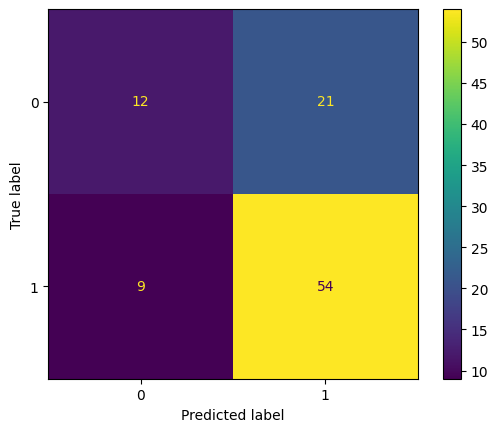

In [37]:
y_pred_xgb_cl = xgb_cl.predict(X_test)
# Confusion Matrix and reports
print("CLASSIFICATION REPORT\n", 
      classification_report(y_test, y_pred_xgb_cl),
      "\nconfusion matrix\n",
      confusion_matrix(y_test, y_pred_xgb_cl),
      "\n\nAccuracy =",
      accuracy_score(y_test, y_pred_xgb_cl)
      )
cm = confusion_matrix(y_test, y_pred_xgb_cl) 
display = ConfusionMatrixDisplay(
    confusion_matrix = cm, display_labels = xgb_cl.classes_)
display.plot()
plt.show()